In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

blobs = pd.read_csv('Mall_Customers.csv')
colnames = list(blobs.columns[1:-1])
blobs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
# Encode the 'Gender' column
label_encoder = LabelEncoder()
blobs['Gender'] = label_encoder.fit_transform(blobs['Gender'])

print(blobs.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


In [ ]:
# Display information of DataFrame
blobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [ ]:
# Counts the number of null values (or NaN) in each column of a DataFrame.
print(blobs.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Identify and count the total number of duplicate rows.
print("Number of duplicate rows: ", blobs.duplicated().sum())

Number of duplicate rows:  0


In [ ]:
# Remove outliers using the IQR (Interquartile Range) method
Q1 = blobs.quantile(0.25)
Q3 = blobs.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((blobs < (Q1 - 1.5 * IQR)) | (blobs > (Q3 + 1.5 * IQR))).any(axis=1)

# Shows rows containing outliers
print("Rows containing outliers:")
print(blobs[outliers])

# Highlight rows that contain outliers
blobs['Outlier'] = outliers

Rows containing outliers:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199       1   32                 137                      18
199         200       1   30                 137                      83


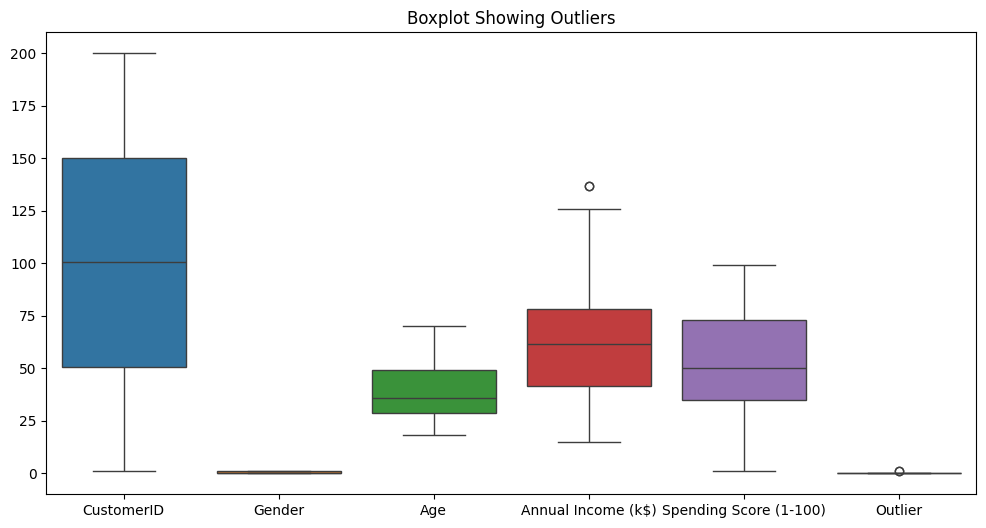

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              198 non-null    int64
 1   Gender                  198 non-null    int64
 2   Age                     198 non-null    int64
 3   Annual Income (k$)      198 non-null    int64
 4   Spending Score (1-100)  198 non-null    int64
 5   Outlier                 198 non-null    bool 
dtypes: bool(1), int64(5)
memory usage: 9.5 KB


In [ ]:
# Visualize data with box plots to see outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=blobs)
plt.title("Boxplot Showing Outliers")
plt.show()

# Remove outliers from DataFrame
blobs = blobs[~outliers]

blobs.info()

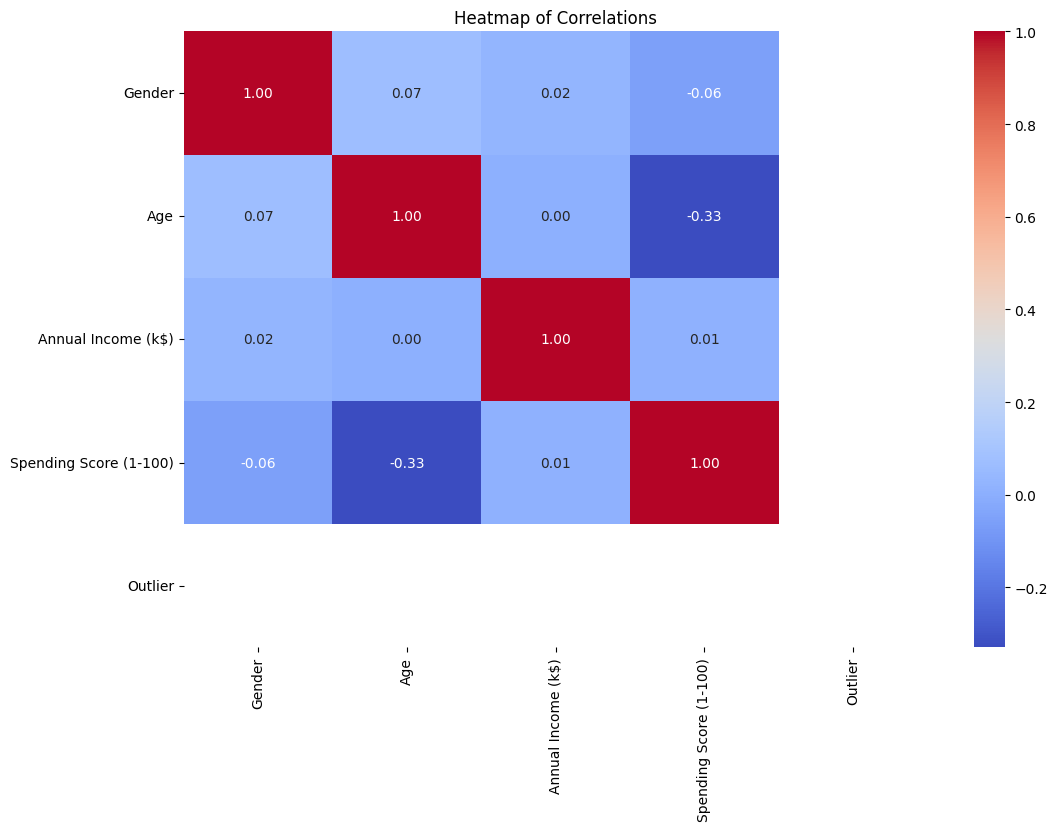

In [ ]:
# Drop 'CustomerID' column for visualization
blobs_viz = blobs.drop(columns=['CustomerID'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(blobs_viz.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap of Correlations')
plt.show()

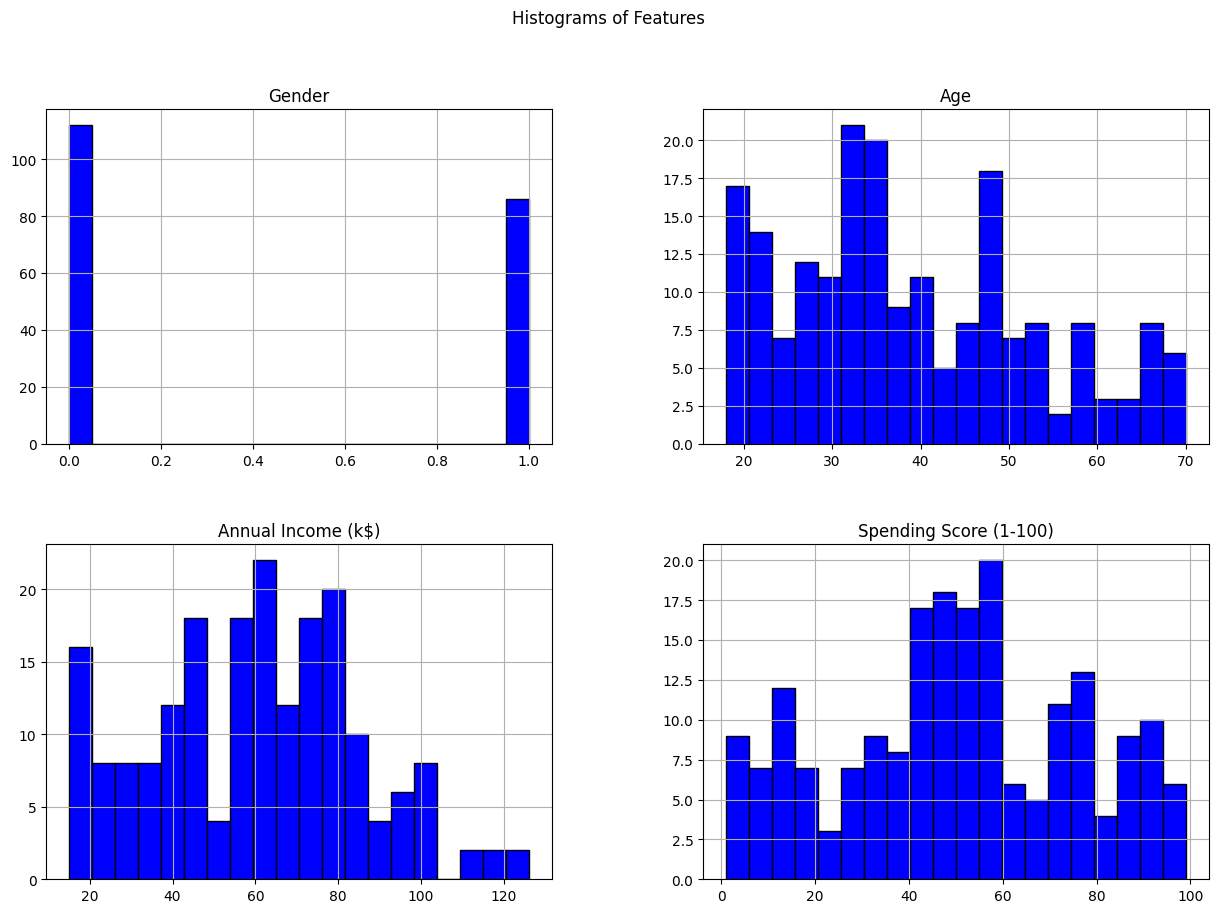

In [ ]:
# Plot histograms for each column
blobs_viz.hist(figsize=(15, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

From the histograms above, we can draw some characteristics of the customer group in the data

### Characteristics of the customer group:

1. **Gender:**
- The number of female customers is larger than that of male customers.

- The data on gender is not too skewed, because the number of men and women is still quite balanced, although there is a difference.

2. **Age:**
- Customers belong to many different ages, but are concentrated in the age group of around 30 and 40-50.

- No age group is absolutely dominant, showing the diversity of customer ages.

3. **Annual Income (k$):**
- Customers' annual income ranges from 20 to 120 thousand dollars.

- There are some common income levels such as around 60 thousand dollars, but no income level is absolutely dominant.

- Income data is quite diverse and not skewed much.

4. **Spending Score (1-100):**
- Spending scores are distributed quite evenly from 1 to 100.

- Some spending scores such as around 40-60 have a higher frequency, but are not too different from other scores.

- Spending score distribution is quite even, not skewed.

### Assessing data skewness:

- **Gender:** Not too skewed, because both genders have a significant number of customers.

- **Age:** Distribution is quite diverse, not skewed towards a specific age.

- **Annual Income (k$):** Not skewed much, although there are some more popular income levels but they are not absolutely dominant.

- **Spending Score (1-100):** Spending score distribution is quite even, not skewed.

In summary, from the histograms, we can see that the customer base in this data is quite diverse in terms of gender, age, income, and spending points. The data is not skewed much, showing balance and good representation of customer characteristics.

In [ ]:
colnames

['Gender', 'Age', 'Annual Income (k$)']

In [ ]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = blobs[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
centroids = initiate_centroids(k, df)
centroids

,Gender,Age,Annual Income (k$),Spending Score (1-100)
65,1,18,48,59
114,0,18,65,48
16,0,35,21,35


In [ ]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors.
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2))

In [ ]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 6436369.00
Error for centroid 1: 6240004.00
Error for centroid 2: 293764.00


In [ ]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid.
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [ ]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),centroid,error
0,1,19,15,39,2,95481.0
1,1,21,15,81,0,2502724.0
2,0,20,16,6,2,1190281.0
3,0,23,16,77,0,1887876.0
4,0,31,17,40,2,3249.0


In [ ]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,Gender,Age,Annual Income (k$)
0,0.407407,30.240741,45.055556
1,0.456311,39.174757,77.514563
2,0.414634,49.756098,34.658537


In [ ]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementationd for a
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0

    # Step 2: Initiate clusters by defining centroids
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
        err.append(sum(j_err))

        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

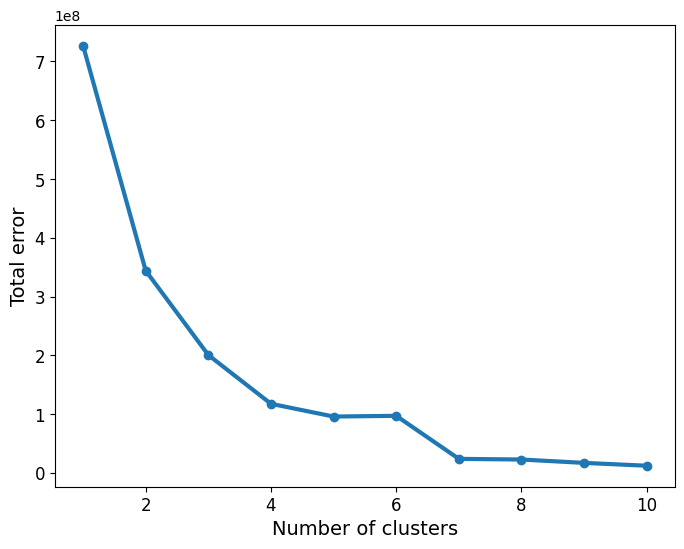

In [ ]:
err_total = []
n = 10

df_elbow = blobs[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']], 5)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),centroid,error
0,1,19,15,39,2,1.305645e+06
1,1,21,15,81,0,4.081887e+04
2,0,20,16,6,2,9.305465e+05
3,0,23,16,77,0,2.220005e+04
4,0,31,17,40,2,4.266312e+05


In [ ]:
df.head(500)

,Gender,Age,Annual Income (k$),Spending Score (1-100),centroid,error
0,1,19,15,39,2,1.305645e+06
1,1,21,15,81,0,4.081887e+04
2,0,20,16,6,2,9.305465e+05
3,0,23,16,77,0,2.220005e+04
4,0,31,17,40,2,4.266312e+05
...,...,...,...,...,...,...
193,0,38,113,91,3,7.726337e+05
194,0,47,120,16,4,1.374928e+06
195,0,35,120,79,3,1.501002e+06
196,0,45,126,28,4,2.884568e+06


In [ ]:
# Define the mapping from centroid numbers to labels
centroid_labels = {0: 'Poor', 1: 'Average', 2: 'Below Average', 3: 'Above Average', 4: 'Rich'}

# Map the centroid numbers to labels
df['centroid_label'] = df['centroid'].map(centroid_labels)
print(df)


     Gender  Age  Annual Income (k$)  Spending Score (1-100)  centroid  \
0         1   19                  15                      39         2   
1         1   21                  15                      81         0   
2         0   20                  16                       6         2   
3         0   23                  16                      77         0   
4         0   31                  17                      40         2   
..      ...  ...                 ...                     ...       ...   
193       0   38                 113                      91         3   
194       0   47                 120                      16         4   
195       0   35                 120                      79         3   
196       0   45                 126                      28         4   
197       1   32                 126                      74         3   

            error centroid_label  
0    1.305645e+06  Below Average  
1    4.081887e+04           Poor  
2    9

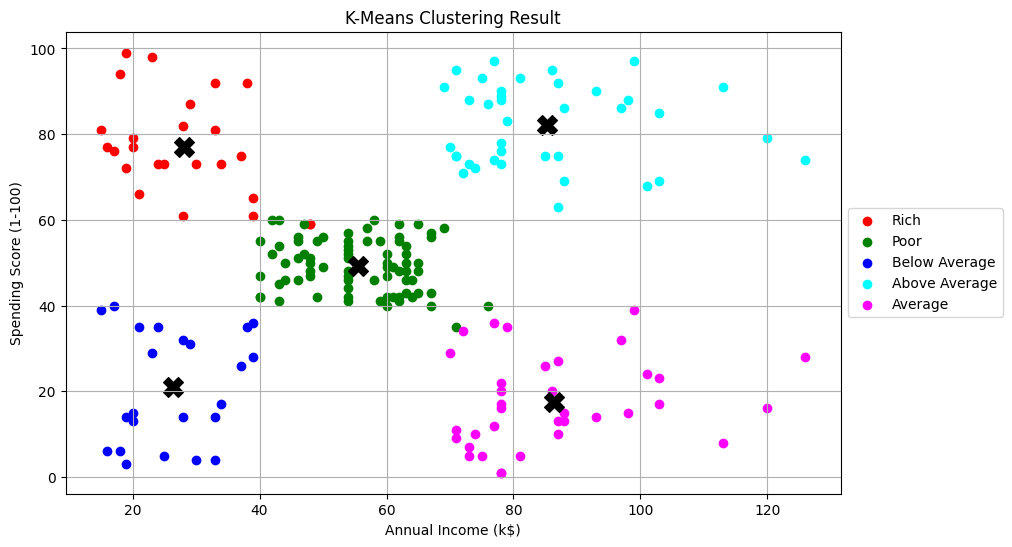

In [ ]:
# prompt: draw chart for K Means Clustering result



# Assuming your dataframe is named 'df' and has columns 'Annual Income (k$)' and 'Spending Score (1-100)'
# and 'centroid' for cluster assignment

# Create a color map for different clusters
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'orange']

# Plot the data points with different colors for each cluster
plt.figure(figsize=(10, 6))
for i in range(len(df['centroid'].unique())):
    cluster_data = df[df['centroid'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                color=colors[i % len(colors)], label='Cluster {}'.format(i))

# Plot the centroids
plt.scatter(centroids['Annual Income (k$)'], centroids['Spending Score (1-100)'],
            color='black', marker='X', s=200, label='Centroids')

# Set labels and title
legend1 = ["Rich","Poor","Below Average","Above Average","Average"]
# Add labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering Result')
plt.legend(legend1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [ ]:
# Lọc các nhãn cần thiết
filtered_df = df[df['centroid_label'].isin(['Rich', 'Poor', 'Below Average', 'Above Average', 'Average'])]

# In ra DataFrame đã lọc
print(filtered_df)

# Đếm số lượng dòng cho mỗi nhãn
label_counts = filtered_df['centroid_label'].value_counts()
print(label_counts)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  centroid  \
0         1   19                  15                      39         2   
1         1   21                  15                      81         0   
2         0   20                  16                       6         2   
3         0   23                  16                      77         0   
4         0   31                  17                      40         2   
..      ...  ...                 ...                     ...       ...   
193       0   38                 113                      91         3   
194       0   47                 120                      16         4   
195       0   35                 120                      79         3   
196       0   45                 126                      28         4   
197       1   32                 126                      74         3   

            error centroid_label  
0    1.305645e+06  Below Average  
1    4.081887e+04           Poor  
2    9

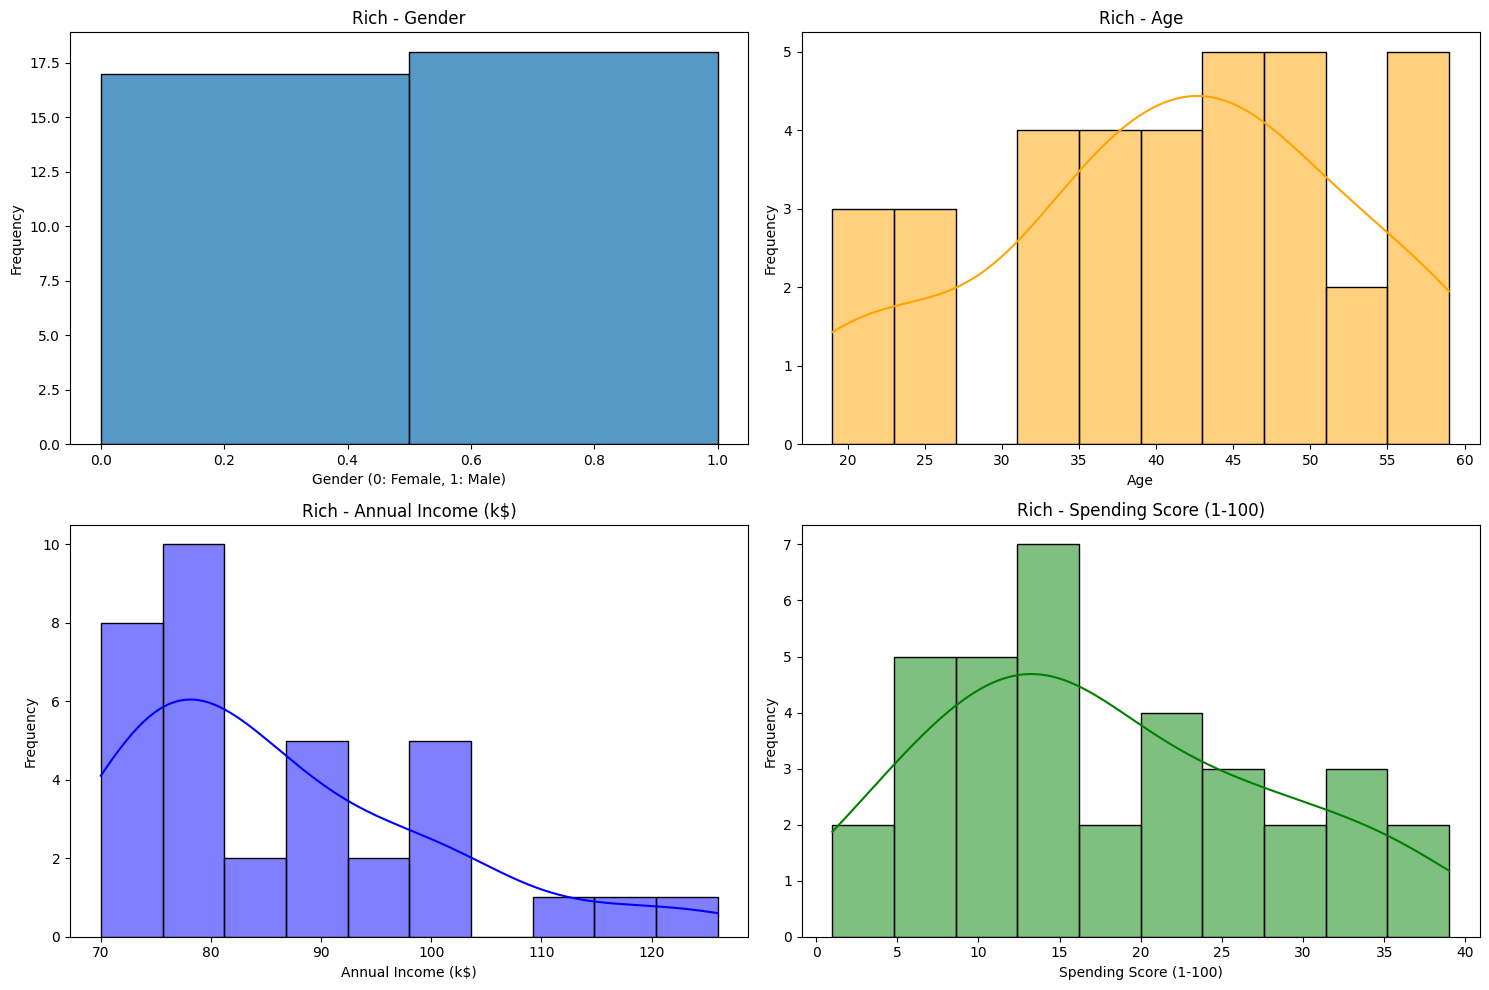

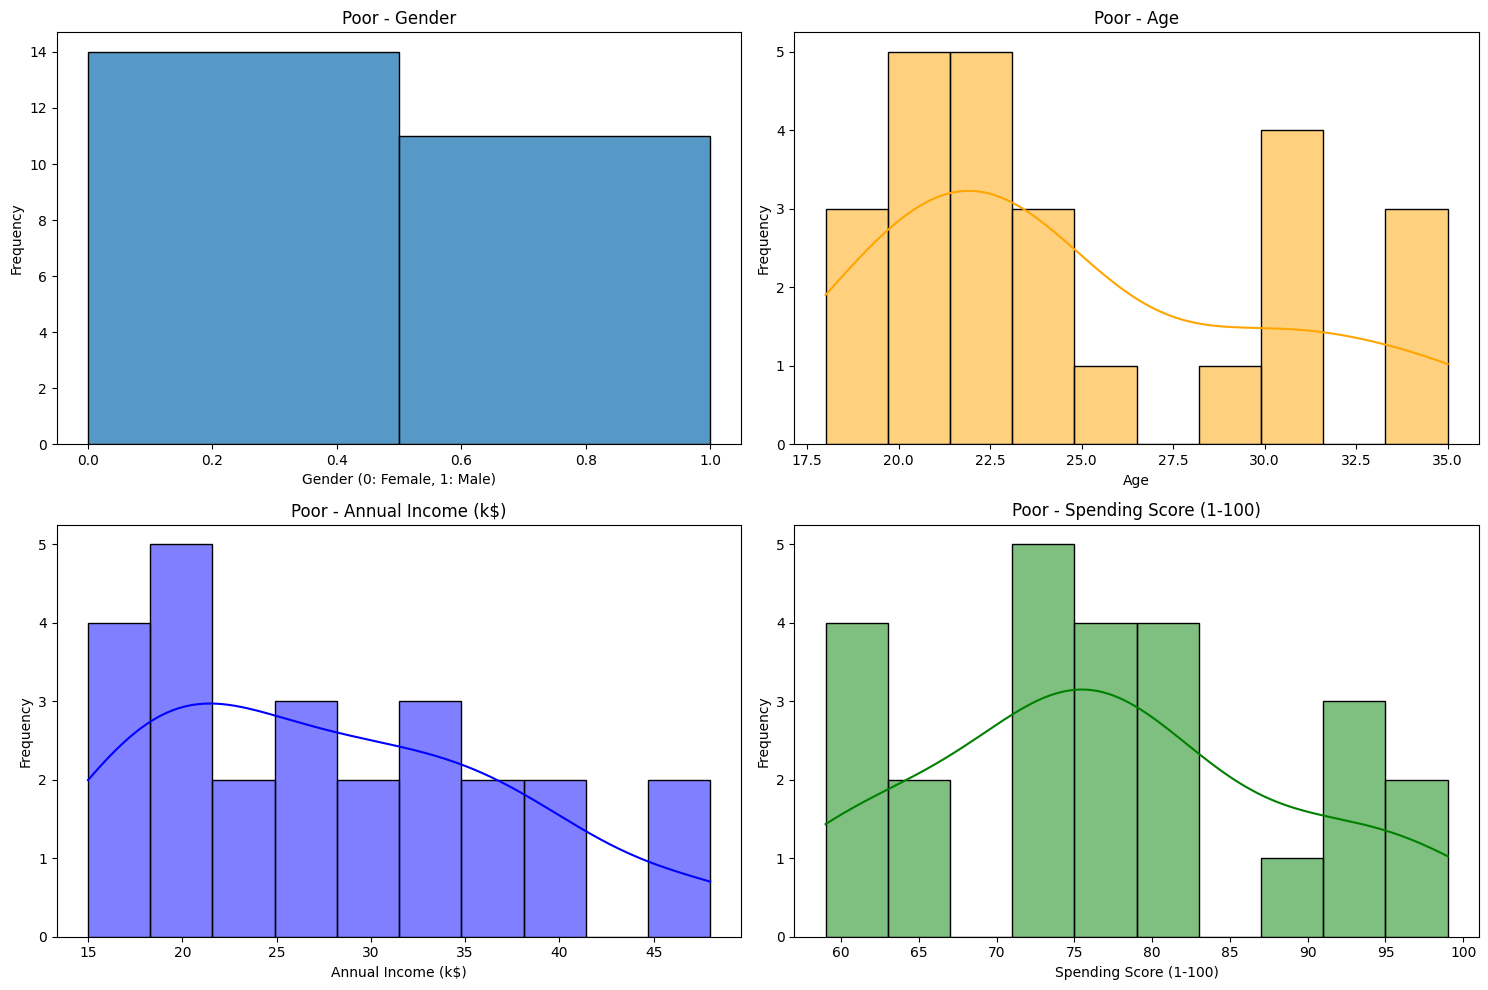

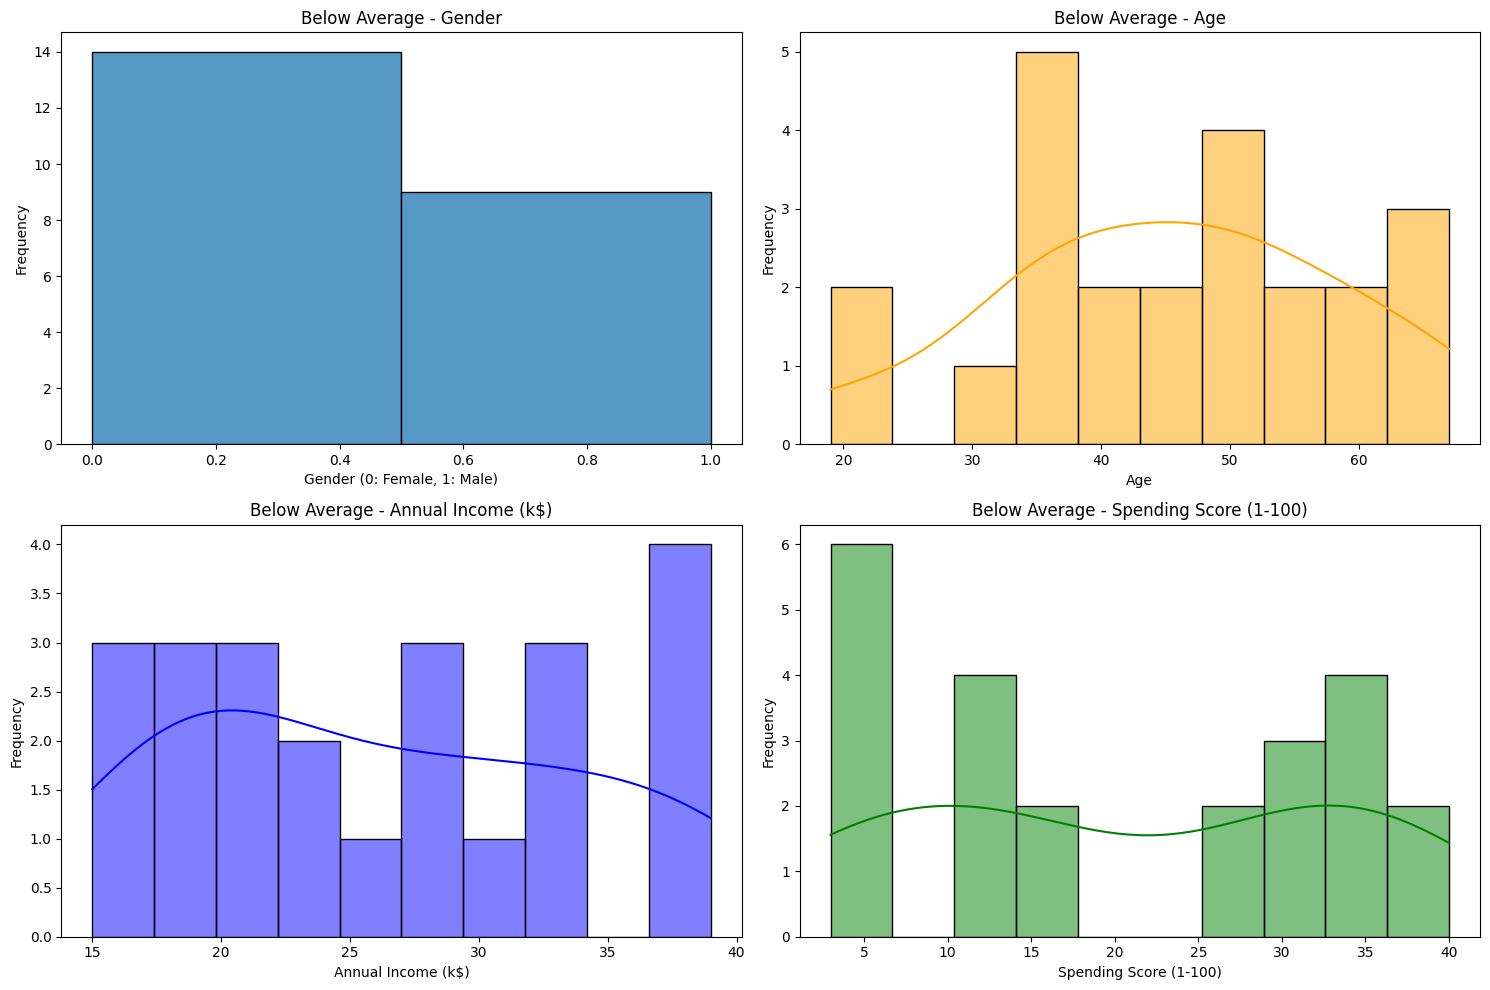

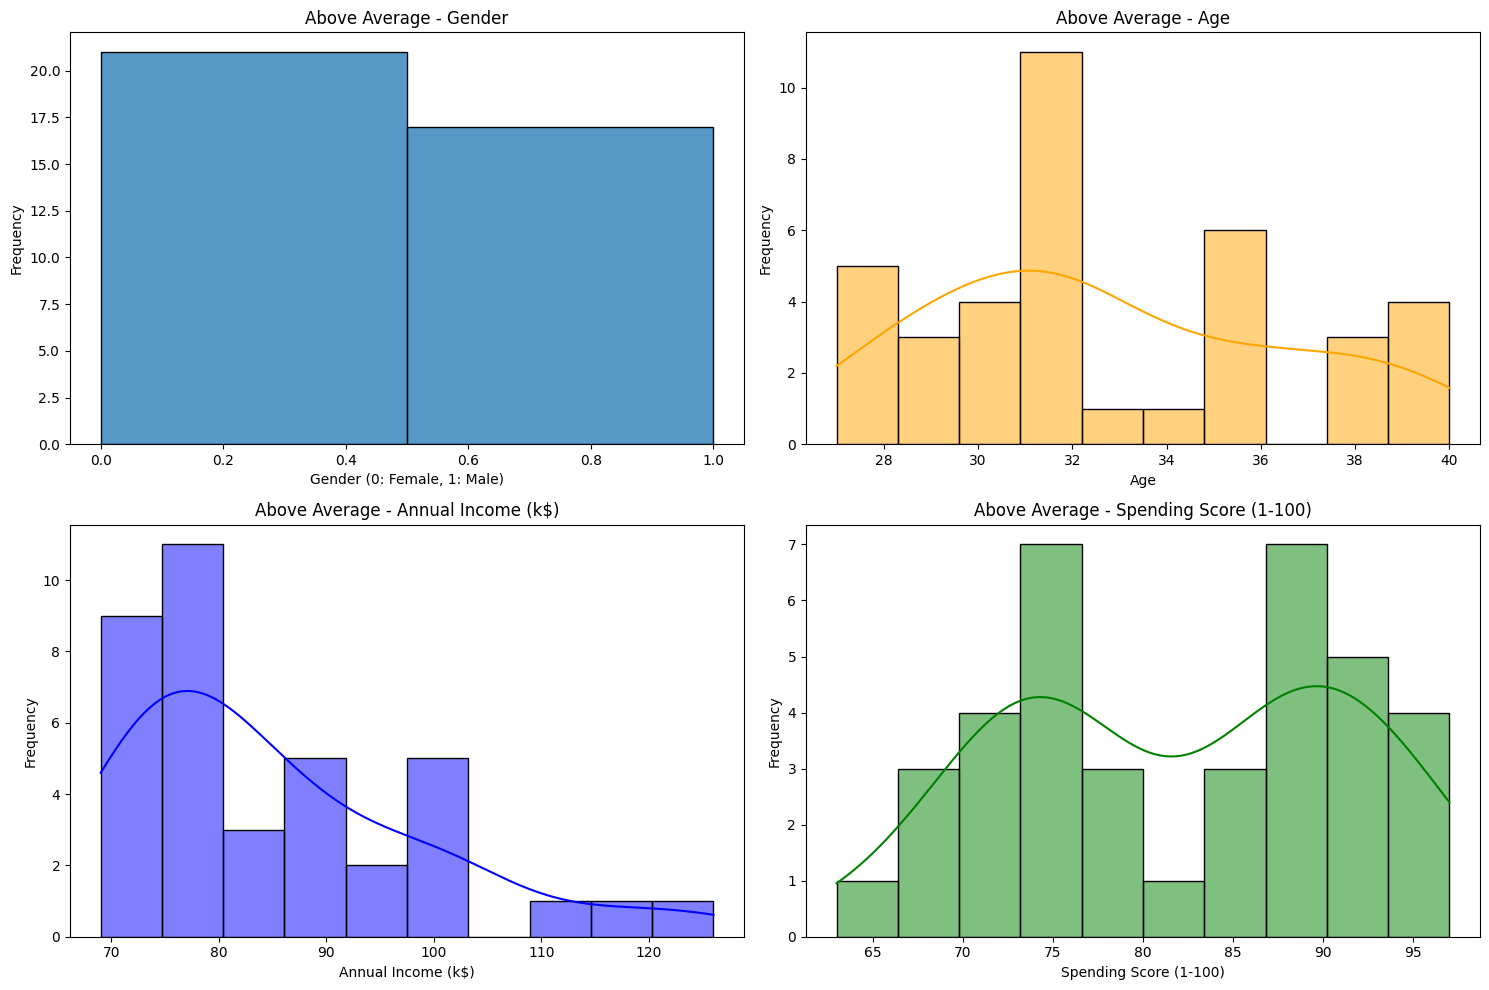

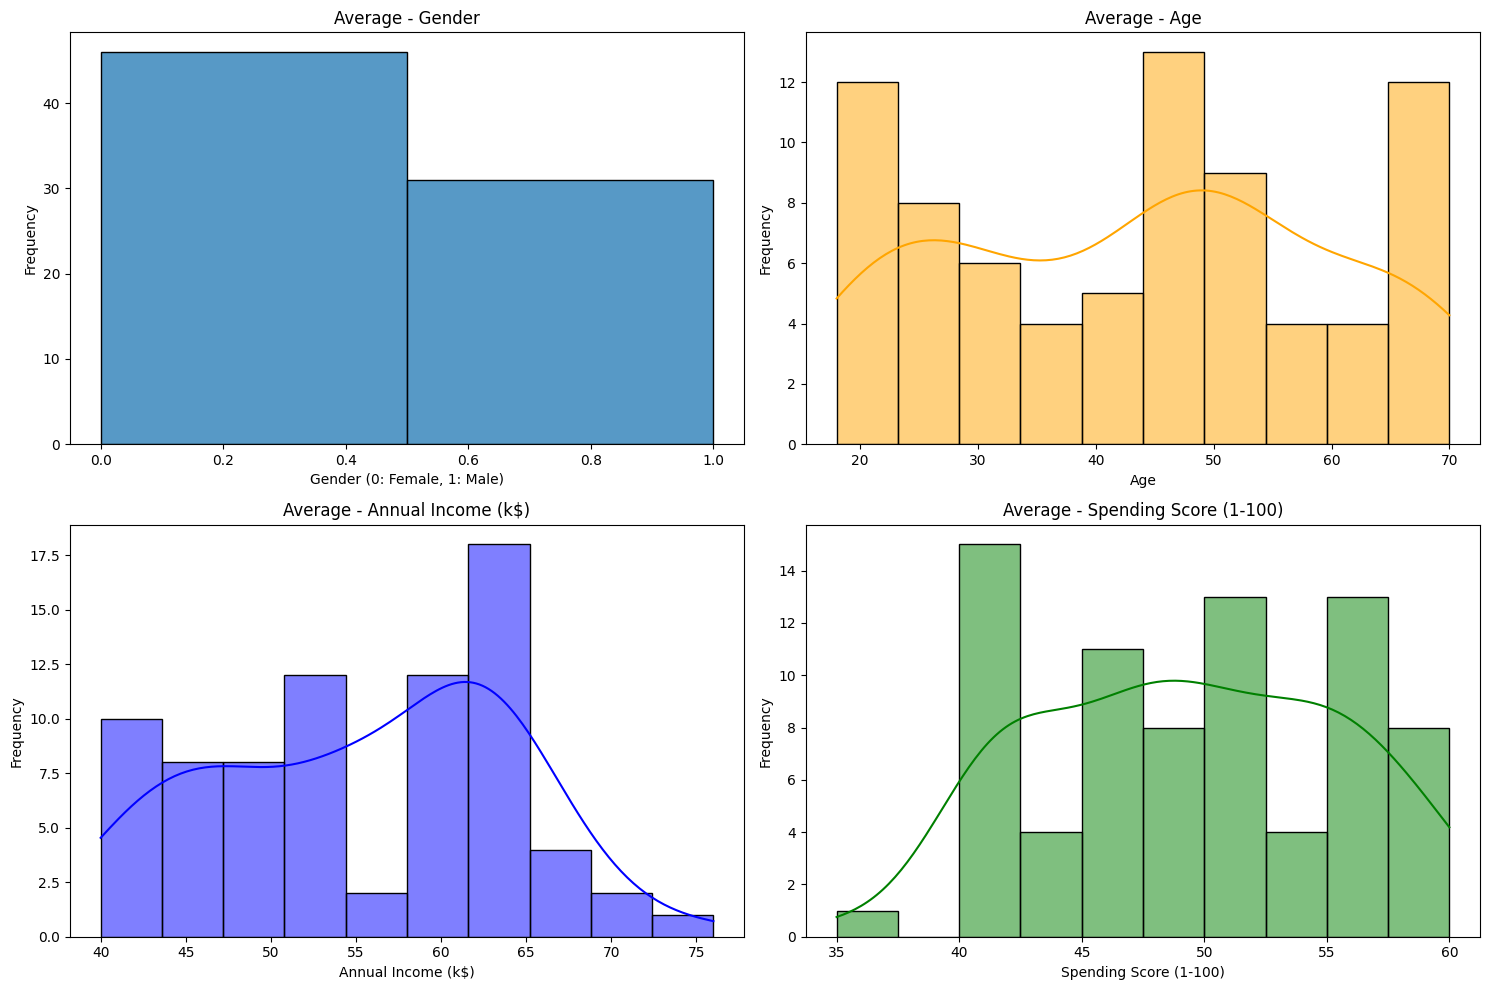

In [ ]:

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
# Vẽ biểu đồ phân phối cho mỗi nhãn
labels = ['Rich', 'Poor', 'Below Average', 'Above Average', 'Average']

for label in labels:
    subset = filtered_df[filtered_df['centroid_label'] == label]

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(subset['Gender'].astype('category').cat.codes, kde=False, bins=2)
    plt.title(f'{label} - Gender')
    plt.xlabel('Gender (0: Female, 1: Male)')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    sns.histplot(subset['Age'], kde=True, bins=10, color='orange')
    plt.title(f'{label} - Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    sns.histplot(subset['Annual Income (k$)'], kde=True, bins=10, color='blue')
    plt.title(f'{label} - Annual Income (k$)')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    sns.histplot(subset['Spending Score (1-100)'], kde=True, bins=10, color='green')
    plt.title(f'{label} - Spending Score (1-100)')
    plt.xlabel('Spending Score (1-100)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [ ]:
tmp_df = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)','centroid_label']]
tmp_df.to_csv('Mall_Customers_Labeled.csv', index=False)